<a href="https://colab.research.google.com/github/AbrarAdnan/Data-Science-practice/blob/main/data_analysis_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/MasterCourse/Week 11 - Building Neural Networks with PyTorch/Lecture 40 - Tabular Data Analysis and Feature Extraction

/content/drive/MyDrive/MasterCourse/Week 11 - Building Neural Networks with PyTorch/Lecture 40 - Tabular Data Analysis and Feature Extraction


# Data Analysis And Feature Extraction

In [6]:
df = pd.read_csv("adult.csv") # Uploaded the file in colab instead of importing from drive
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.shape

(48842, 15)

In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Continuous Attributes

In [9]:
df.describe(include=(np.number))

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


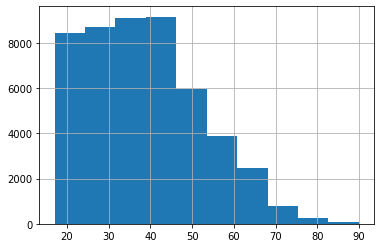

In [10]:
df['age'].hist()

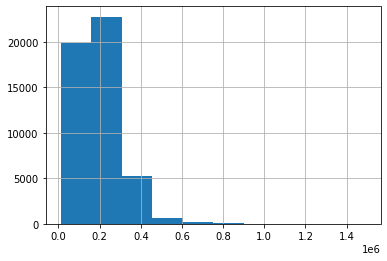

In [11]:
df['fnlwgt'].hist()

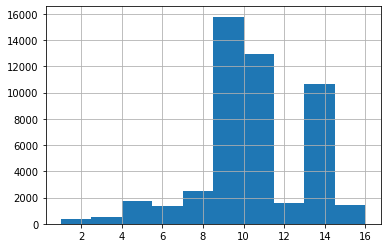

In [12]:
df['educational-num'].hist()

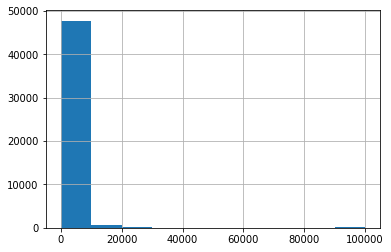

In [13]:
df['capital-gain'].hist()

In [14]:
df['log-capital-gain'] = np.log(df['capital-gain'] + 1)

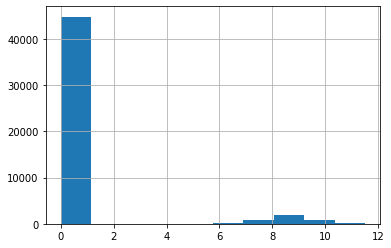

In [15]:
df['log-capital-gain'].hist()

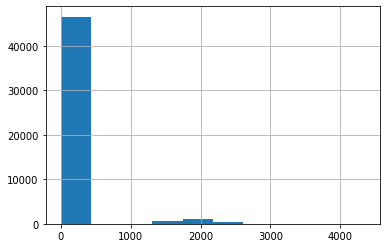

In [16]:
df['capital-loss'].hist()

In [17]:
df['log-capital-loss'] = np.log(df['capital-loss'] + 1)

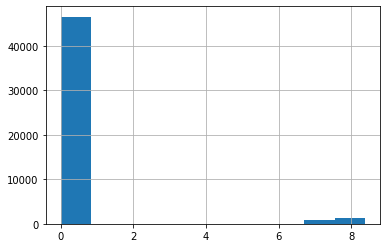

In [18]:
df['log-capital-loss'].hist()

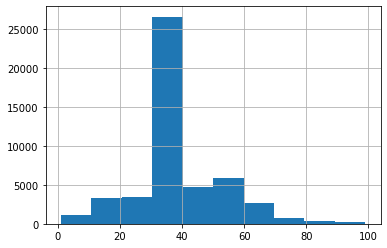

In [19]:
df['hours-per-week'].hist()

### Categorical Attributes

In [20]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

**Private Workclass is much more than others, so we can consider Private and Non-Private as two classes**

In [21]:
df['private_workclass'] = (df['workclass'] == "Private")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False


In [22]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

**Let's divide it into 3 classes: post_grad, after High School, School**

In [23]:
post_grad_levels = ["Masters", "Doctorate"]
post_grad_status = []
for idx, row in df.iterrows():
  if row['education'] in post_grad_levels:
    post_grad_status.append(1)
  else:
    post_grad_status.append(0)

df['postgrad_education'] = post_grad_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0


In [24]:
af_HS_levels = ["Bachelors", "Assoc-acdm", "Some-college", "Prof-school", "Assoc-voc", "HS-grad"]
af_HS_status = []
for idx, row in df.iterrows():
  if row['education'] in af_HS_levels:
    af_HS_status.append(1)
  else:
    af_HS_status.append(0)

df['after_HS_education'] = af_HS_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0,True,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0.000000,0.0,True,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0.000000,0.0,False,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0,True,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0.000000,0.0,False,0,1


In [25]:
school_levels = ["12th", "11th", "10th", "9th", "7th-8th", "5th-6th", "1st-4th", "Preschool"]
school_status = []
for idx, row in df.iterrows():
  if row['education'] in school_levels:
    school_status.append(1)
  else:
    school_status.append(0)

df['school_education'] = school_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,capital-loss,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,40,United-States,<=50K,0.000000,0.0,True,0,0,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,50,United-States,<=50K,0.000000,0.0,True,0,1,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,40,United-States,>50K,0.000000,0.0,False,0,1,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,40,United-States,>50K,8.947546,0.0,True,0,1,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,30,United-States,<=50K,0.000000,0.0,False,0,1,0


**Let's simplify it to married and unmarried**

In [26]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [27]:
married_levels = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
married_status = []
for idx, row in df.iterrows():
  if row['marital-status'] in married_levels:
    married_status.append(1)
  else:
    married_status.append(0)

df['married'] = married_status
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,<=50K,0.000000,0.0,True,0,0,1,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,<=50K,0.000000,0.0,True,0,1,0,1
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,>50K,0.000000,0.0,False,0,1,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,>50K,8.947546,0.0,True,0,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,30,United-States,<=50K,0.000000,0.0,False,0,1,0,0


**We will divide the occupations into 4 categories: white_collar, blue_collar, service, others**

In [28]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [29]:
occupations = {
    "Prof-specialty": "white_collar",
    "Craft-repair": "blue_collar",
    "Exec-managerial": "white_collar",
    "Adm-clerical": "white_collar",
    "Sales": "white_collar",
    "Other-service": "service",
    "Machine-op-inspct": "blue_collar",
    "?": "others",
    "Transport-moving": "blue_collar",
    "Handlers-cleaners": "blue_collar",
    "Farming-fishing": "blue_collar",
    "Tech-support": "white_collar",
    "Protective-serv": "blue_collar",
    "Priv-house-serv": "service",
    "Armed-Forces": "others"
}

occupation_category = [occupations[row['occupation']] for idx, row in df.iterrows()]
df['occupation_cat'] = occupation_category
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,native-country,income,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,United-States,<=50K,0.000000,0.0,True,0,0,1,0,blue_collar
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,United-States,<=50K,0.000000,0.0,True,0,1,0,1,blue_collar
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,United-States,>50K,0.000000,0.0,False,0,1,0,1,blue_collar
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,United-States,>50K,8.947546,0.0,True,0,1,0,1,blue_collar
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,United-States,<=50K,0.000000,0.0,False,0,1,0,0,others


In [30]:
df = pd.get_dummies(df, columns=["occupation_cat"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,married,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0.0,True,0,0,1,0,1,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0.0,True,0,1,0,1,1,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0.0,False,0,1,0,1,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0.0,True,0,1,0,1,1,0,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0.0,False,0,1,0,0,0,1,0,0


**cannot be more fine-grained**

In [31]:
df['relationship'].value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [32]:
df = pd.get_dummies(df, columns=["relationship"])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_blue_collar,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,1,0,0,0,0,0,0,1,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,1,0,0,0,1,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,1,0,0,0,1,0,0,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,1,0,0,0,1,0,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,0,1,0,0,0,0,0,1,0,0


**Most of them are white. So will go with white and non-white**

In [33]:
df['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [34]:
df['race_white'] = (df['race'] == "White")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_others,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,0,0,0,0,0,0,1,0,0,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,0,0,0,1,0,0,0,0,0,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,0,0,0,1,0,0,0,0,0,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,0,0,0,1,0,0,0,0,0,False
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,1,0,0,0,0,0,1,0,0,True


**same for gender**

In [35]:
df['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [36]:
df['gender_male'] = (df['gender'] == "Male")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_service,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,0,0,0,0,0,1,0,0,False,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,0,0,1,0,0,0,0,0,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,0,0,1,0,0,0,0,0,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,0,0,1,0,0,0,0,0,False,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,0,0,0,0,0,1,0,0,True,False


**Most of them are from US. So will go with US and non-US**

In [37]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [38]:
df['country_US'] = (df['native-country'] == "United-States")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,occupation_cat_white_collar,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,0,0,0,0,1,0,0,False,True,True
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,0,1,0,0,0,0,0,True,True,True
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,0,1,0,0,0,0,0,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,0,1,0,0,0,0,0,False,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,0,0,0,0,1,0,0,True,False,True


**This is the target. Let's categorize into high or low income**

In [39]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [40]:
df['high_income'] = (df['income'] == ">50K")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,race,gender,capital-gain,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Black,Male,0,...,0,0,0,1,0,0,False,True,True,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,White,Male,0,...,1,0,0,0,0,0,True,True,True,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,White,Male,0,...,1,0,0,0,0,0,True,True,True,True
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,...,1,0,0,0,0,0,False,True,True,True
4,18,?,103497,Some-college,10,Never-married,?,White,Female,0,...,0,0,0,1,0,0,True,False,True,False


In [41]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income'],
      dtype='object')

# Split data and store everything

In [42]:
df = df[['age', 'fnlwgt', 'educational-num', 'hours-per-week',
       'log-capital-gain', 'log-capital-loss', 'private_workclass',
       'postgrad_education', 'after_HS_education', 'school_education',
       'married', 'occupation_cat_blue_collar', 'occupation_cat_others',
       'occupation_cat_service', 'occupation_cat_white_collar',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife', 'race_white',
       'gender_male', 'country_US', 'high_income']]

df.head()

,age,fnlwgt,educational-num,hours-per-week,log-capital-gain,log-capital-loss,private_workclass,postgrad_education,after_HS_education,school_education,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_white,gender_male,country_US,high_income
0,25,226802,7,40,0.000000,0.0,True,0,0,1,...,0,0,0,1,0,0,False,True,True,False
1,38,89814,9,50,0.000000,0.0,True,0,1,0,...,1,0,0,0,0,0,True,True,True,False
2,28,336951,12,40,0.000000,0.0,False,0,1,0,...,1,0,0,0,0,0,True,True,True,True
3,44,160323,10,40,8.947546,0.0,True,0,1,0,...,1,0,0,0,0,0,False,True,True,True
4,18,103497,10,30,0.000000,0.0,False,0,1,0,...,0,0,0,1,0,0,True,False,True,False


In [43]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 42, stratify=df.high_income)
len(df), len(train_df), len(test_df)

(48842, 39073, 9769)

In [44]:
train_df.to_csv("adult_train.csv", index=False)
test_df.to_csv("adult_test.csv", index=False)